## Solución de ODE's I: Ejercicios 1-4

__Ejercicio 1:__. Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.

In [1]:
function metodo_euler(f,x0,t0,tf,h)
    x = x0
    lista_x = []
    push!(lista_x,x)
    lista_t = linspace(t0,tf,(tf-t0)/h+1) #Debemos de sumarle 1, si no, no da el ancho requerido
    
    for i in 2:length(lista_t)  #Empezamos en 2, el primer termino x0 ya se dió
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    
    return lista_x,lista_t
end;

* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

In [2]:
function f(x,t)
    -(2.5)*x
end;

In [3]:
#Probamos para cada h
metodo_euler(f,1,0,8,1)

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], 0.0:1.0:8.0)

In [4]:
metodo_euler(f,1,0,8,0.5)

(Any[1, -0.25, 0.0625, -0.015625, 0.00390625, -0.000976563, 0.000244141, -6.10352e-5, 1.52588e-5, -3.8147e-6, 9.53674e-7, -2.38419e-7, 5.96046e-8, -1.49012e-8, 3.72529e-9, -9.31323e-10, 2.32831e-10], 0.0:0.5:8.0)

In [5]:
metodo_euler(f,1,0,8,0.2)

(Any[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.00195313  …  4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12, 9.09495e-13], 0.0:0.2:8.0)

In [6]:
metodo_euler(f,1,0,8,0.01)

(Any[1, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9, 1.59843e-9], 0.0:0.01:8.0)

* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.

Vemos que la solucion exacta a la EDO resulta ser:

$$x= \exp{\frac{-5(c_1+t)}{2}} $$

In [7]:
using PyPlot

In [8]:
function q(t)
    exp.(-5t/2)
end;

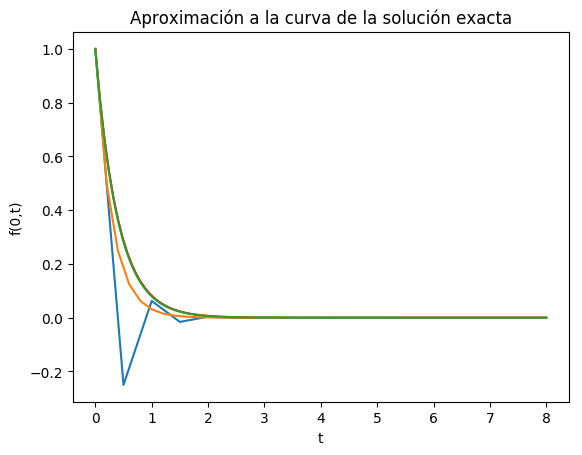

In [9]:
#Graficamos la solucion exacta junto a las aproximaciones con las h dadas a excepcion de h=1
t = linspace(0,8,100)
xlabel("t")
ylabel("f(0,t)")
title("Aproximación a la curva de la solución exacta")
plot(t,q(t),color="r");
plot(metodo_euler(f,1,0,8,0.5)[2],metodo_euler(f,1,0,8,0.5)[1],color="m");
plot(metodo_euler(f,1,0,8,0.2)[2],metodo_euler(f,1,0,8,0.2)[1],color="g");
plot(metodo_euler(f,1,0,8,0.01)[2],metodo_euler(f,1,0,8,0.01)[1],color="y");

_En este caso, la aproximacion es identica a la curva de solucion exacta para h=0.01_

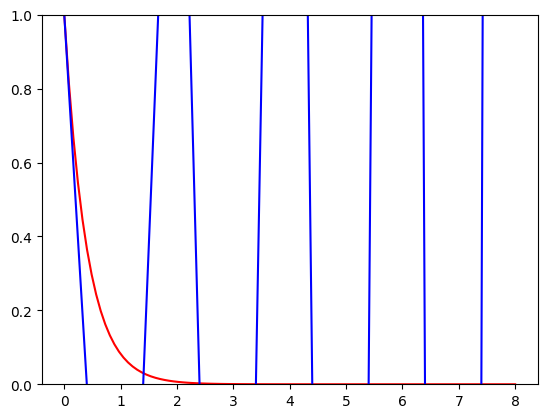

In [10]:
#En el caso de h=1
ylim(0,1)
plot(t,q(t),color="r");
plot(metodo_euler(f,1,0,8,1)[2],metodo_euler(f,1,0,8,1)[1],color="b");

__Ejercicio 2:__. ¿Qué sistema físico está modelado por $\ddot{x} =
-kx$?

__Respuesta:__ _El del oscilador armónico_

* Escriba la solución exacta en terminos de las condiciones iniciales $x(0)$ y $x'(0)$.


A simple vista, uno podría pensar que para resolver este
sistema uno debe desarrollar otro método para encontrar la
solución a la ecuación diferencial del ejercicio pasado. Sin
embargo, esto no es necesario.

__Respuesta:__ La solución es la siguiente:

$$x(t)=A\cos(\omega t)+B\sin(\omega t)$$
$$\dot{x}(t)=-A\omega\sin(\omega t)+B\omega\cos(\omega t)$$

Donde se sabe que $k>0$ y $\omega^2=k$. Aplicando las condiciones iniciales

$x(0)$ y $\dot{x}(0)$:
$$x(0)=A$$ $$\dot{x}(0)=B\omega$$

La solución de la ecuación diferencial queda de la siguiente manera:

$${x(t)=x(0)\cos(\omega t)+\frac{\dot{x}(0)}{\omega}\sin(\omega t)}$$

__Ejercicio 3:__. Haz $u = \dot{x}(t)$ y calcula la derivada de
$u$ ¿qué obtienes y como se relaciona con el sistema
original?

Si llevaste a cabo el ejercicio anterior, te darás cuenta
que terminas con un sistema acoplado de ecuaciones
diferenciales:

$$
\dot{u} = -kx, \dot{x} = u,
$$

Con este sistema acoplado puedes utilizar el método de
Euler en su forma vectorial:
$$\frac{d\vec x}{dt}=\vec f(\vec x,t),$$
donde $\vec x=(x,u)$, y para este caso es facil ver que $\vec f(\vec x,t)=(u,-kx).$

__Respuesta:__ Si se hacemos $u=\dot{x}(t)$, entonces tendriamos que $\dot{u}=\ddot{x}(t)=-kx$. Entonces tendríamos dos ecuaciones:

$$
\dot{x}(t)=u \\
$$
$$
\dot{u}=-kx \\
$$

__Ejercicio 4:__. Obten la solución del sistema $\ddot{x} = -kx(t)$
utilizando lo escrito arriba y el método de Euler.

* Para utilizar el método de Euler, impleméntelo para sistemas de más de una dimensión.

In [11]:
#Usaremos el codigo que realizó david. Nos es más práctico para este caso

function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
    end;

In [12]:
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]]

#Intervalo donde será graficado, de esta manera en ves del linspace por comodidad
list=0:0.01:10;

#Soluciones iniciales x(0)=0 y u(0)=2. Será visto en las listas más adelante...
soluciones_condiciones_iniciales=euler(f,list,[0,2]);

#Por comodidad, lo guardamos todo en listas:
listx1=map(x->x[1],soluciones_condiciones_iniciales);
listx2=map(x->x[2],soluciones_condiciones_iniciales);
listx_solucion_teorica=2*sin.(list); 
listx_derivada_solucion_teorica=2*cos.(list);

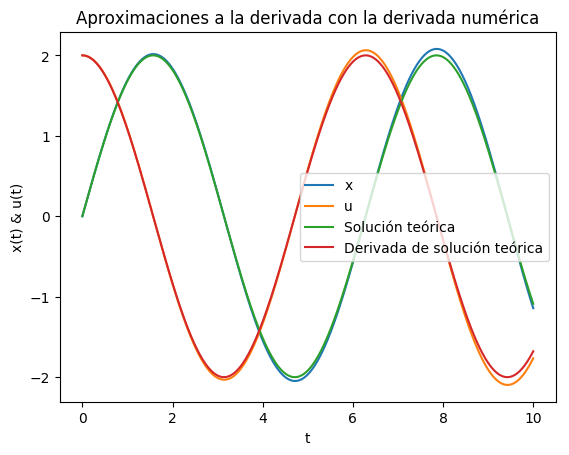

In [13]:
#Finalmente graficamos
xlabel("t")
ylabel("x(t) & u(t)")
title("Aproximaciones a la derivada con la derivada numérica")
plot(list,listx1, label="x");       #¿Por qué aquí si funcionan las label y en el ejercicio 1 y 5 no?
plot(list,listx2, label="u");
plot(list,listx_solucion_teorica, label="Solución teórica");
plot(list,listx_derivada_solucion_teorica, label="Derivada de solución teórica");
legend();

__Ejercicio 5:__ Aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$

__Respuesta:__ De manera similar al ejercicio 1:

In [14]:
function f(x,t)
    (2*x-18*t)/(1+t)
end;

In [15]:
function q(t)
    4+8t-5t^2
end;

In [16]:
#como simplemente no podemos hacer un plot(t,q(t)) por que nos da error de multiplicación de vectores (¿Cómo "soluciono" esto?) vemos a q(t) en una lista a partir de un ejercicio de la tarea 8:

function valores_solucion_exacta(q,t)
    lista_t = collect(t)
    lista_q = []
    r = 0.0
    for i in 1:length(lista_t)
        r = q(lista_t[i])       #No confundir con solo poner i.
        push!(lista_q,r)
    end
    return lista_q              #Que nos regrese las coordenadas en el eje y.
end;

In [17]:
#Veremos que funcione
t = linspace(0,2,100)
valores_solucion_exacta(q,t)

100-element Array{Any,1}:
 4.0     
 4.15958 
 4.31507 
 4.46648 
 4.61381 
 4.75707 
 4.89624 
 5.03132 
 5.16233 
 5.28926 
 5.4121  
 5.53086 
 5.64555 
 ⋮       
 2.41975 
 2.22018 
 2.01653 
 1.8088  
 1.59698 
 1.38108 
 1.16111 
 0.937047
 0.708907
 0.476686
 0.240384
 0.0     

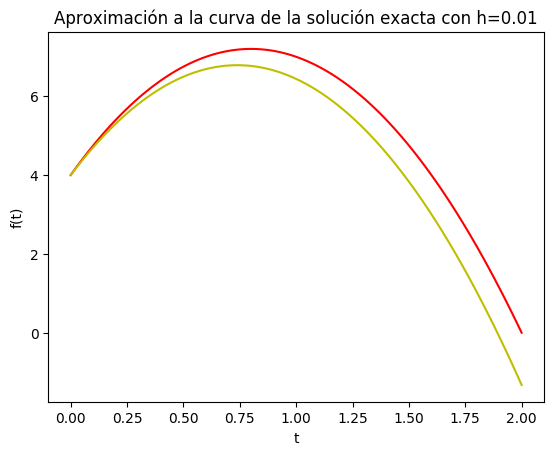

In [20]:
t = linspace(0,2,100)

xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con h=0.01")
plot(t,valores_solucion_exacta(q,t),color="r");
plot(metodo_euler(f,4,0,2,0.01)[2],metodo_euler(f,4,0,2,0.01)[1],color="y");

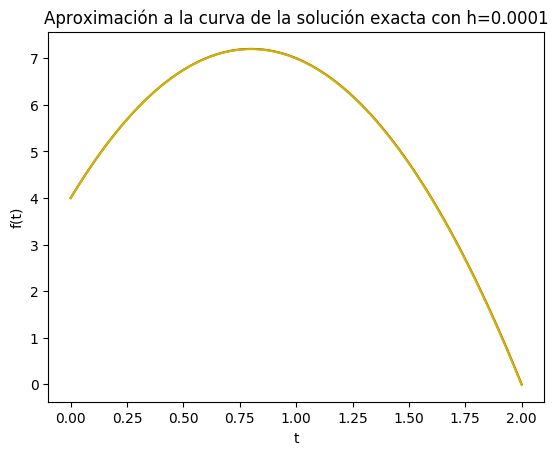

In [22]:
xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con h=0.0001")
plot(t,valores_solucion_exacta(q,t),color="r");
plot(metodo_euler(f,4,0,2,0.0001)[2],metodo_euler(f,4,0,2,0.0001)[1],color="y");

_En este ultimo caso, debido al valor menor de h, se da la impresión que la aproximacion es identica a la curva de la solucion exacta_